# Regresion Lineal:

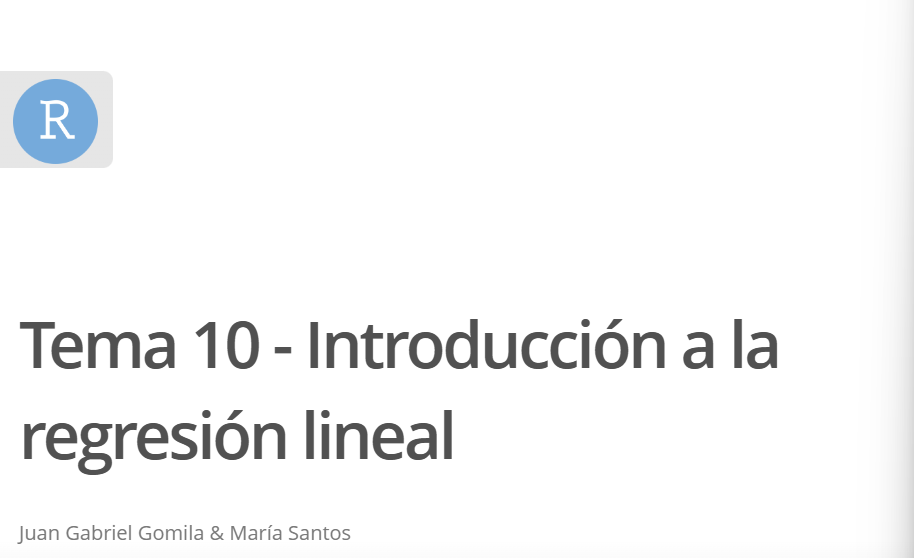

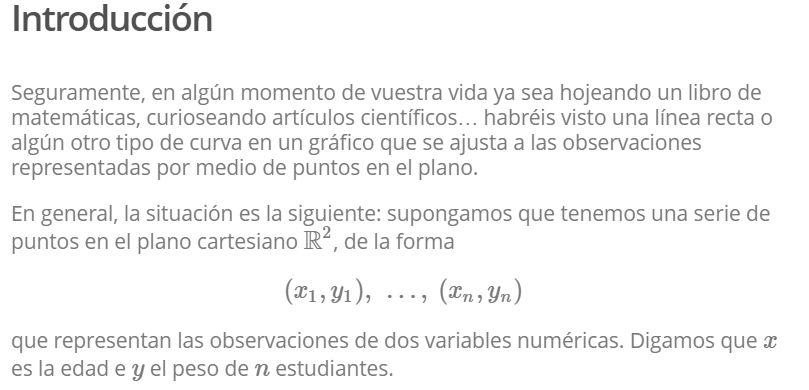

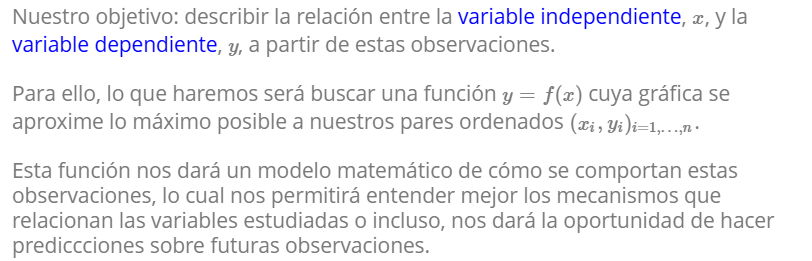

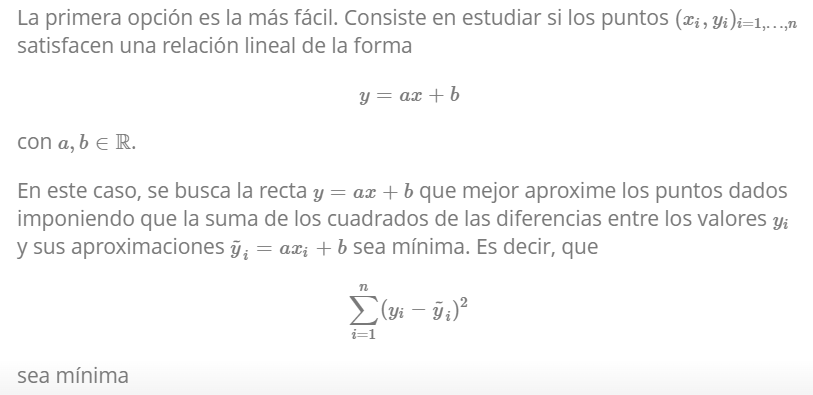

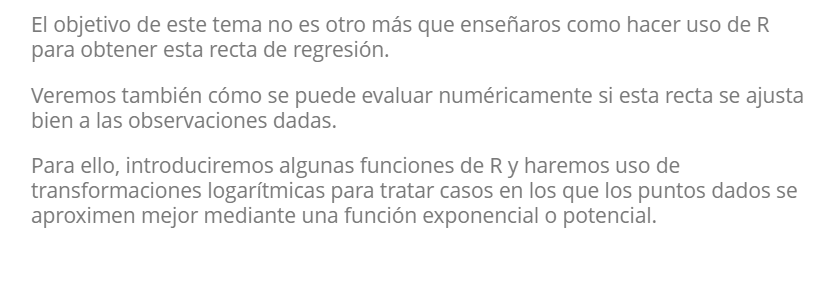

## Calculando rectas de regresión

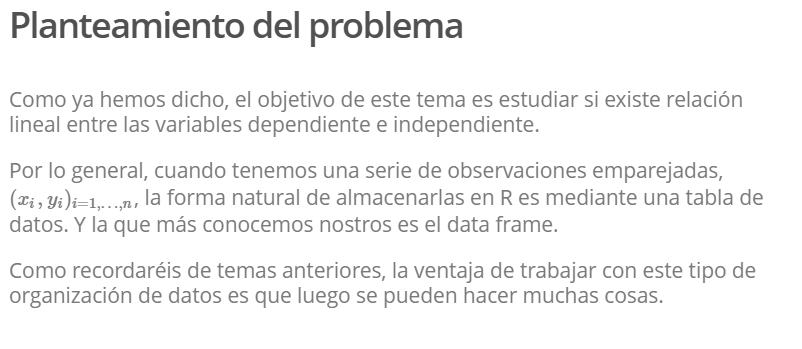

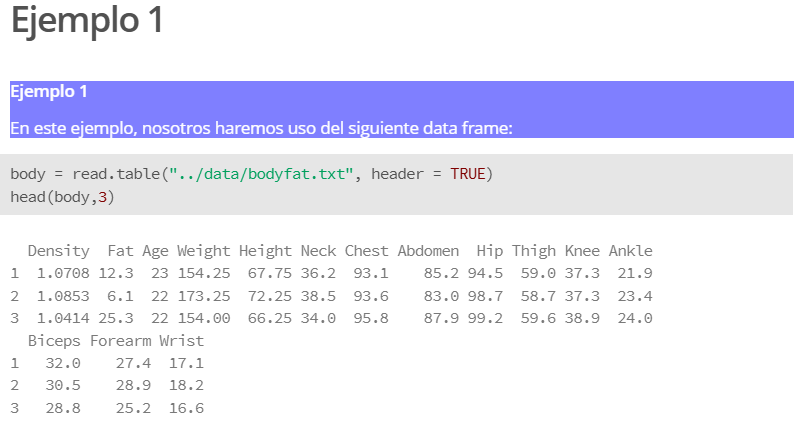

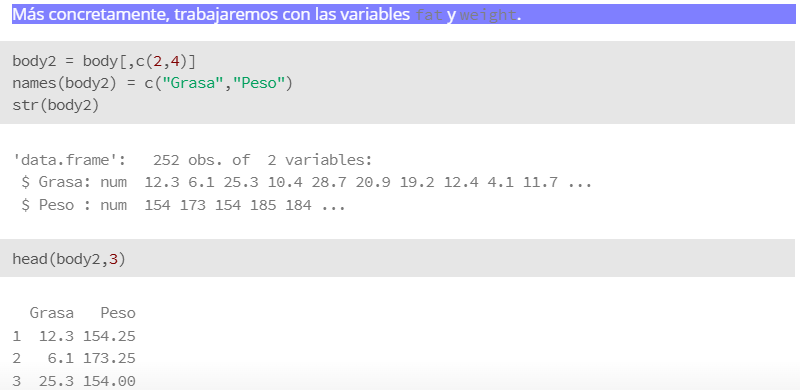

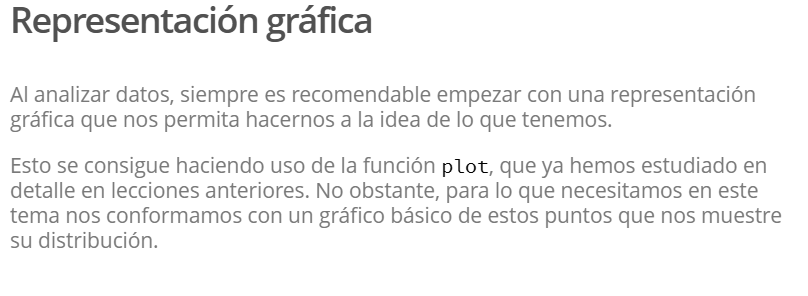

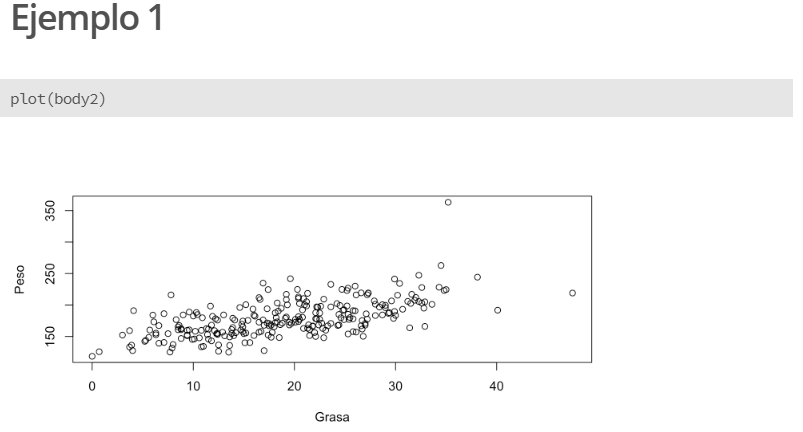

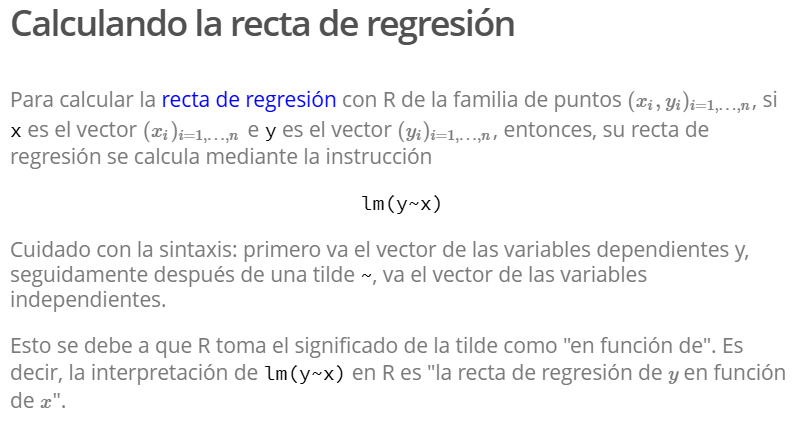

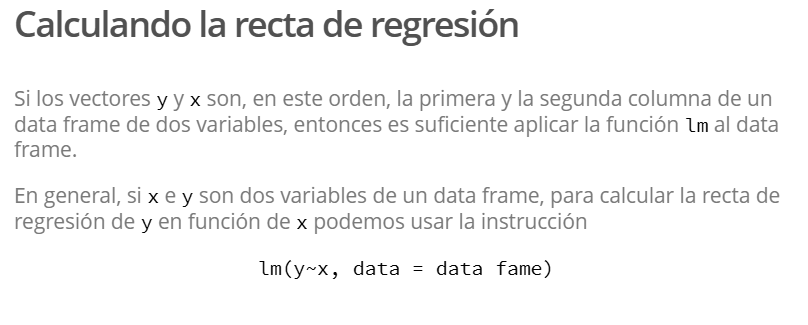

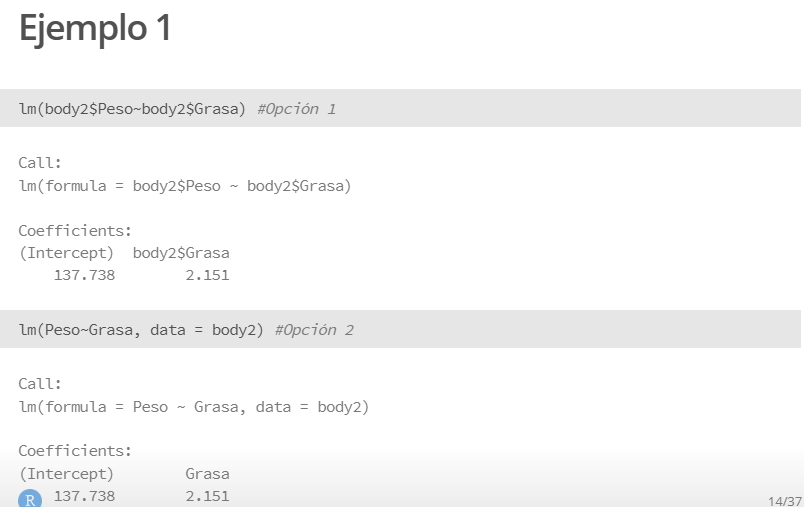

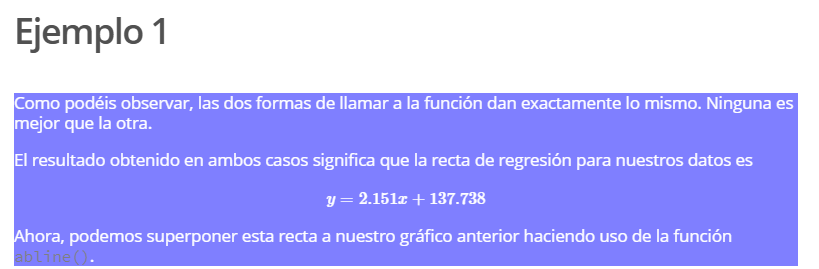

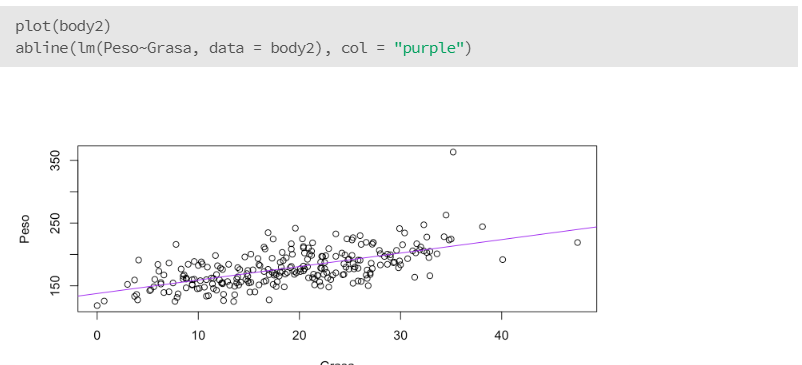

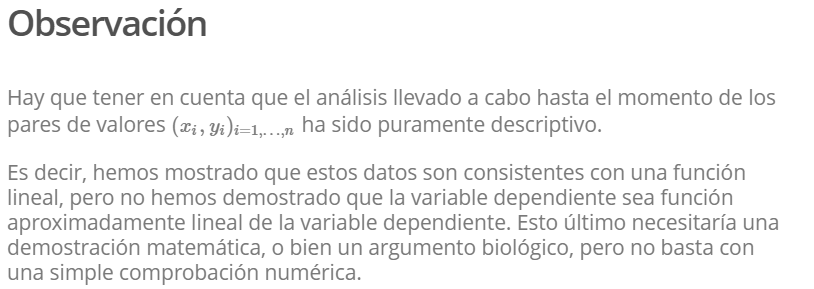

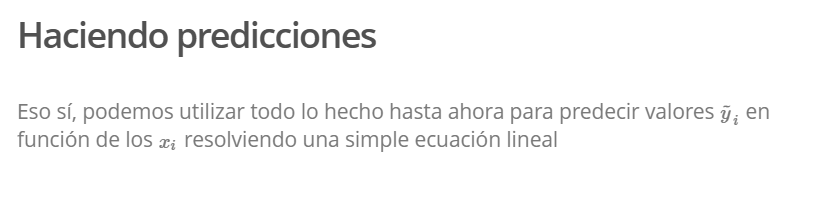

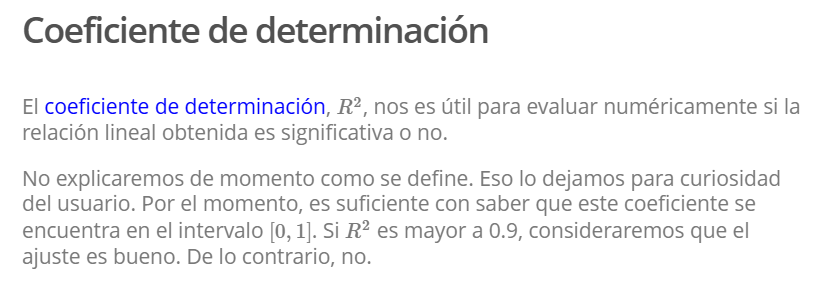

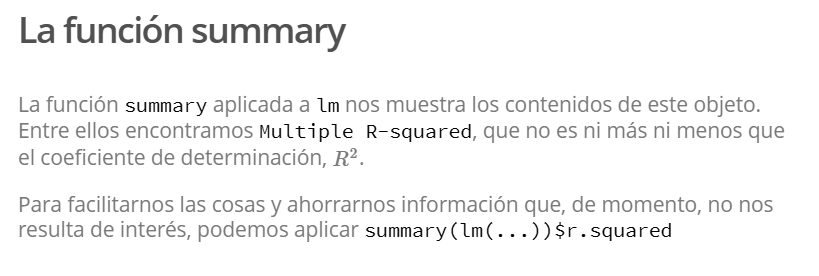

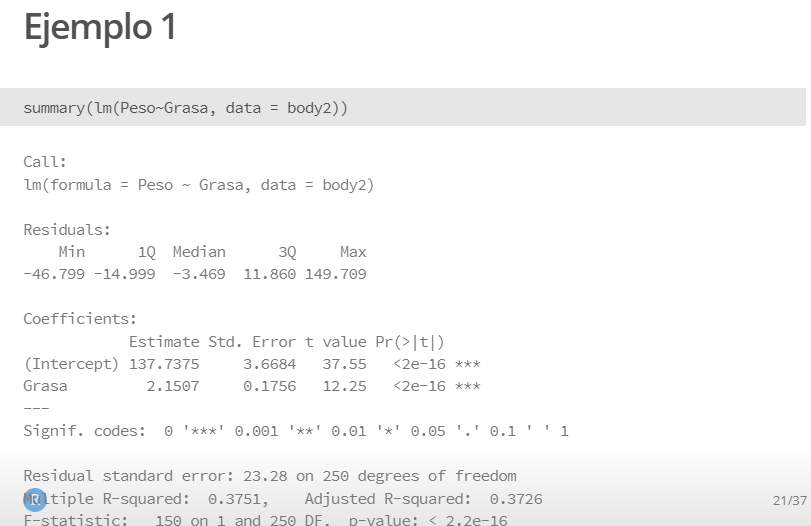

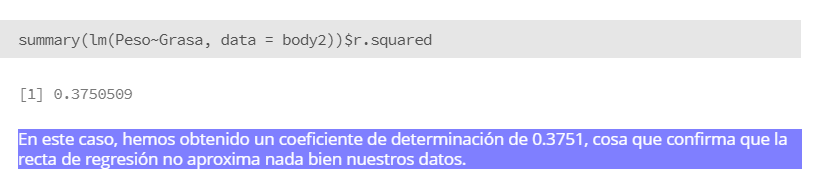

## Rectas de regresión y  transformaciones logarítmicas

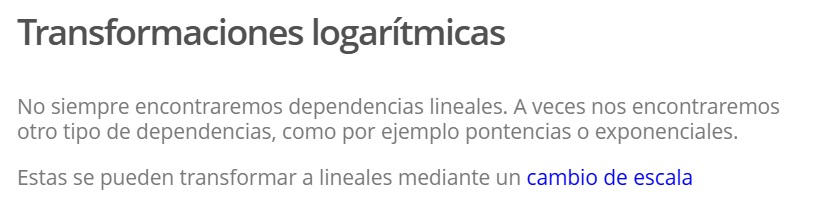

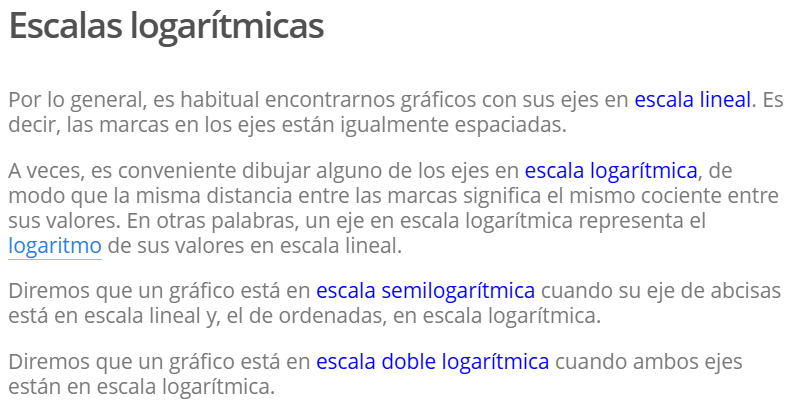

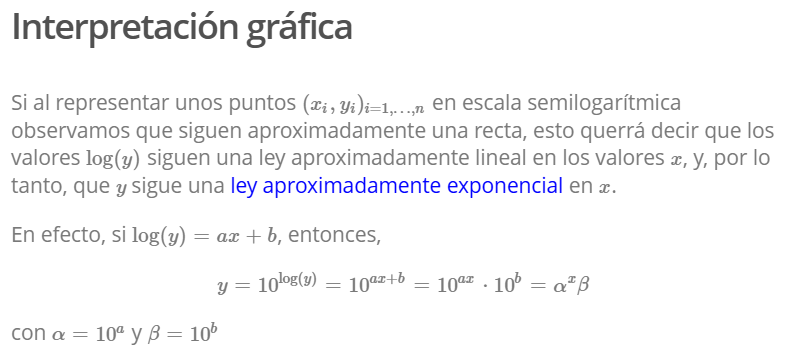

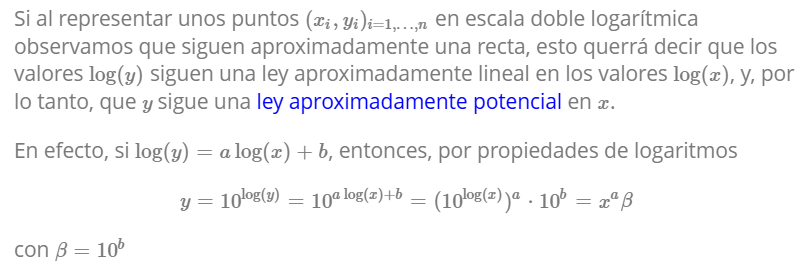

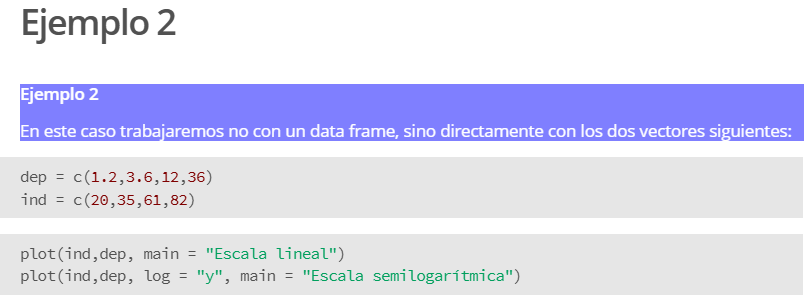

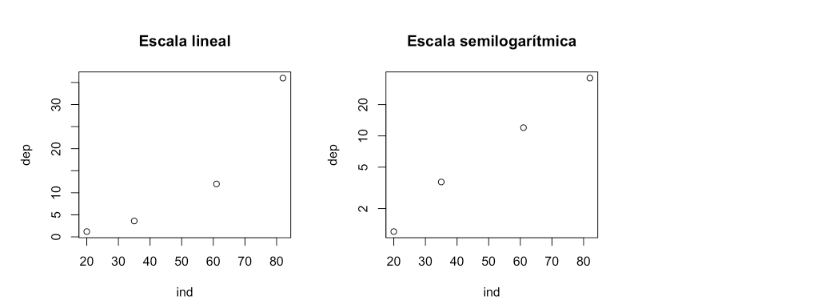

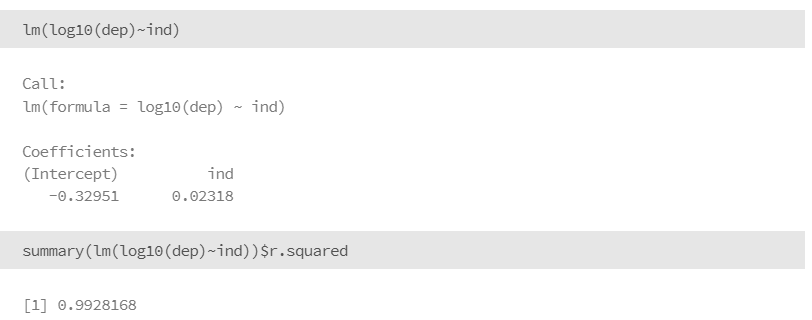

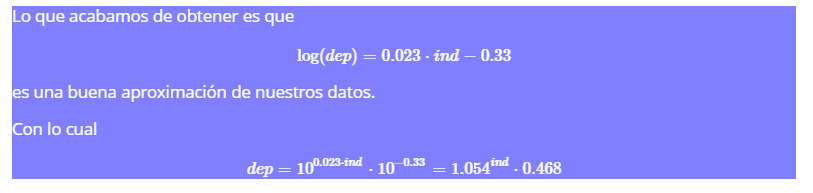

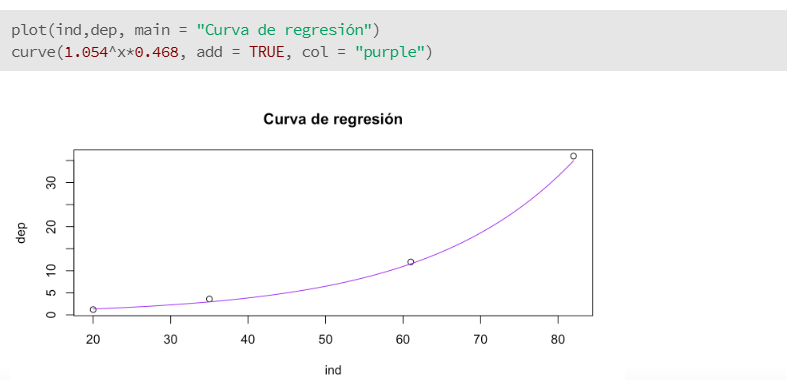

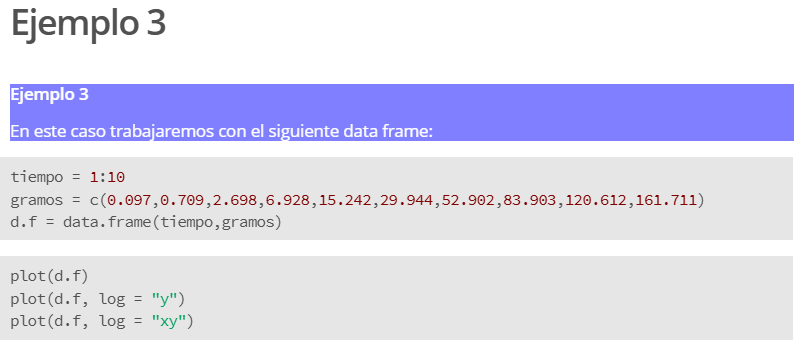

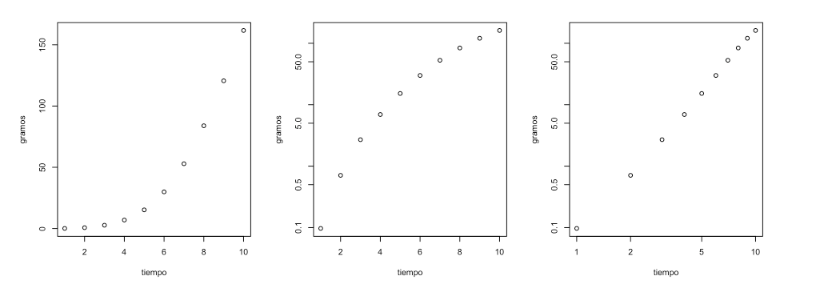

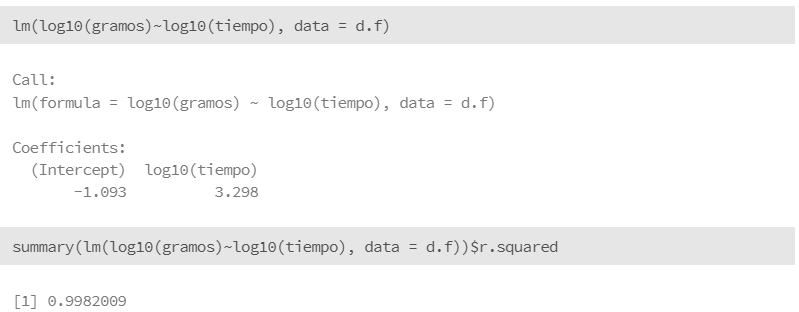

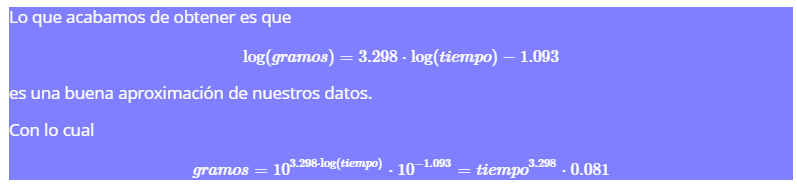

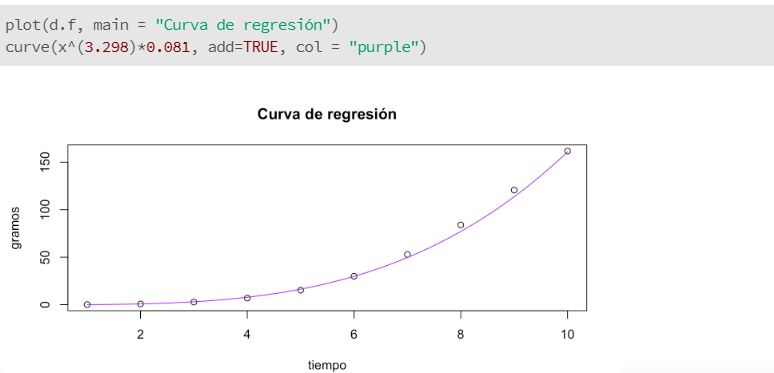

## Ejemplos:

In [1]:
body = read.table("base de datos/bodyfat.txt", header = TRUE)
head(body,3)

,Density,Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6


In [2]:
body2 = body[,c(2,4)] # variables fat y weight
names(body2) = c("Grasa","Peso") # cambiar nombres
str(body2)

'data.frame':	252 obs. of  2 variables:
 $ Grasa: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ Peso : num  154 173 154 185 184 ...


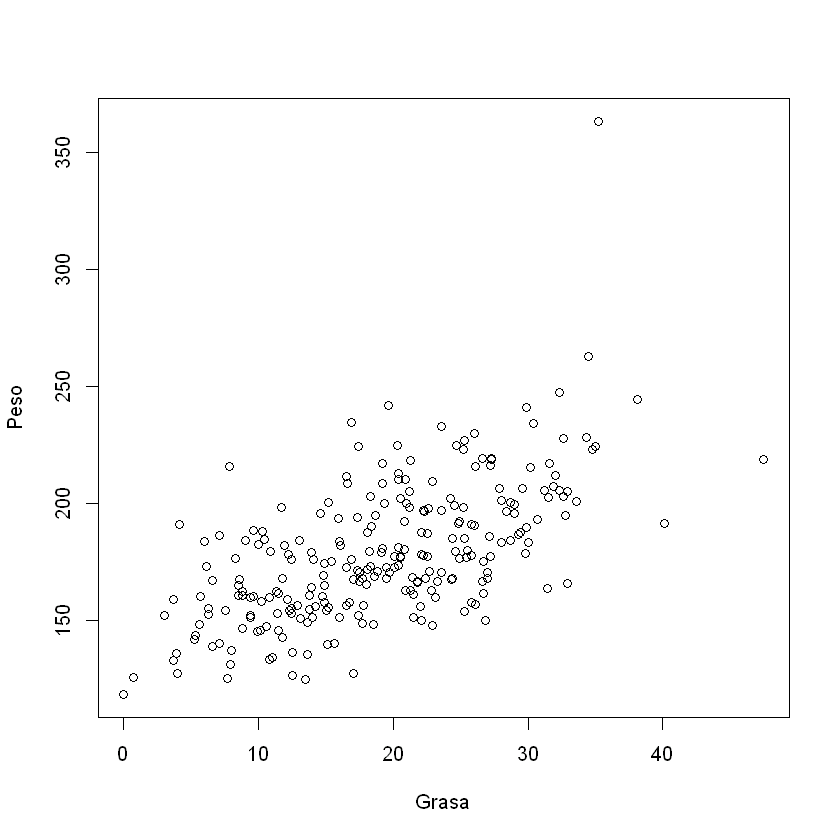

In [3]:
plot(body2) # scatter plot

### Vamos a estimar el peso en funcion de la grasa corporal

In [4]:
# Metodo de regresion lineal, metodo 1
lm(body2$Peso~body2$Grasa) #variables dependientes , variables independientes


Call:
lm(formula = body2$Peso ~ body2$Grasa)

Coefficients:
(Intercept)  body2$Grasa  
    137.738        2.151  


In [5]:
# Metodo de regresion lineal, metodo 2
lm(Peso~Grasa, data = body2)


Call:
lm(formula = Peso ~ Grasa, data = body2)

Coefficients:
(Intercept)        Grasa  
    137.738        2.151  


El resultado obtenido en ambos casos significa que la recta de regresión para nuestros datos es
y = 2.151x + 137.738

Para estimar el peso de una persona, hay que multiplicar la grasa por 2.151 y sumarle 137.738

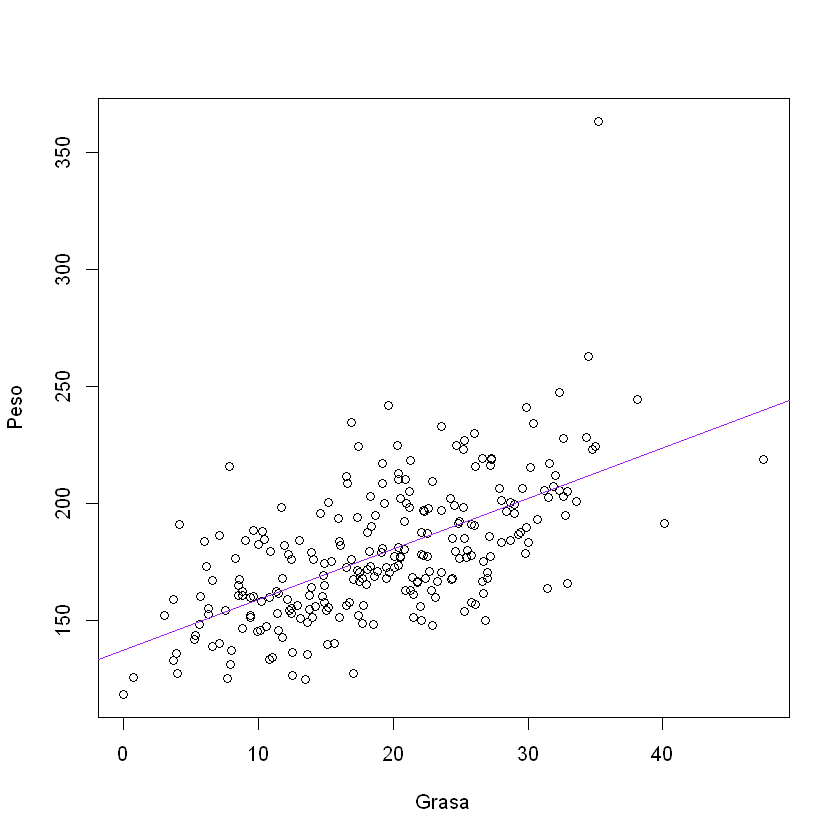

In [6]:
plot(body2)
abline(lm(Peso~Grasa, data = body2), col = "purple") #graficando el modelo lineal

In [7]:
summary(lm(Peso~Grasa, data = body2))


Call:
lm(formula = Peso ~ Grasa, data = body2)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.799 -14.999  -3.469  11.860 149.709 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.7375     3.6684   37.55   <2e-16 ***
Grasa         2.1507     0.1756   12.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.28 on 250 degrees of freedom
Multiple R-squared:  0.3751,	Adjusted R-squared:  0.3726 
F-statistic:   150 on 1 and 250 DF,  p-value: < 2.2e-16


Multiple R-squared:  0.3751 este valor de coeficiente de determinacion debe acercarse lo mas posible a 0.9 para determinar que existe una relacion lineal entre las variables, en este caso la recta de regresion no aproxima nada bien nuestros datos

## Ejemplo 2

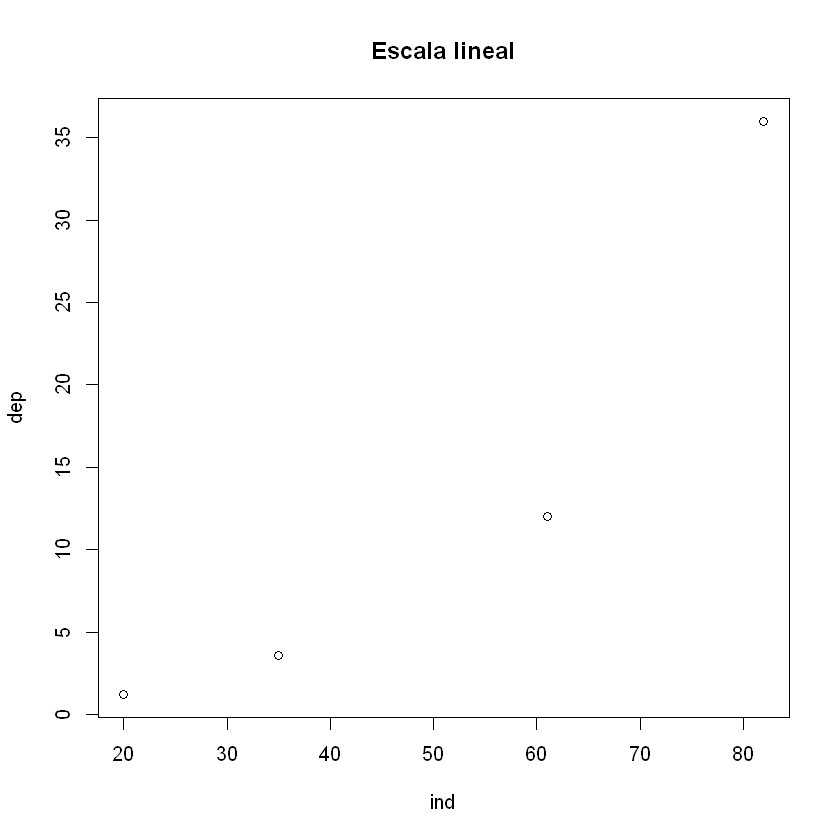

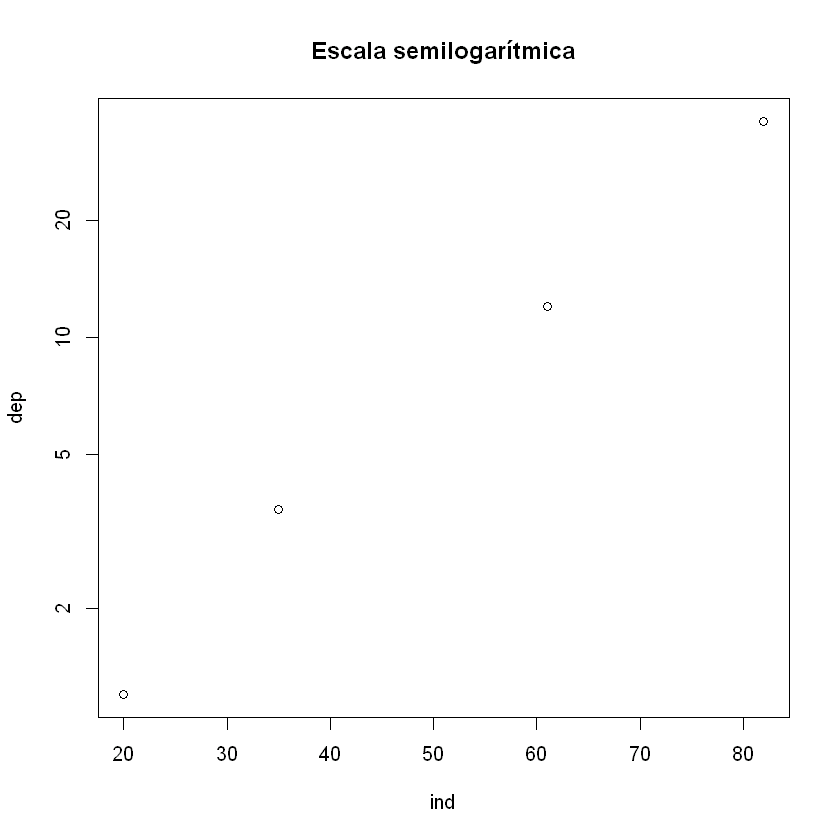

In [9]:
dep = c(1.2,3.6,12,36)
ind = c(20,35,61,82)

plot(ind,dep, main = "Escala lineal")
plot(ind,dep, log = "y", main = "Escala semilogarítmica")

In [10]:
lm(log10(dep)~ind) # hacemos una  transformacion logaritmica a variable dependiente


Call:
lm(formula = log10(dep) ~ ind)

Coefficients:
(Intercept)          ind  
   -0.32951      0.02318  


In [11]:
summary(lm(log10(dep)~ind))$r.squared

[1] 0.9928168

Podemos afirmar que los datos siguen una modelo lineal

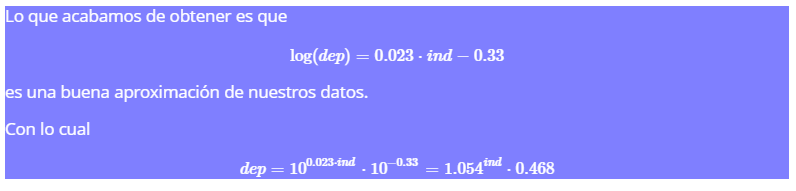

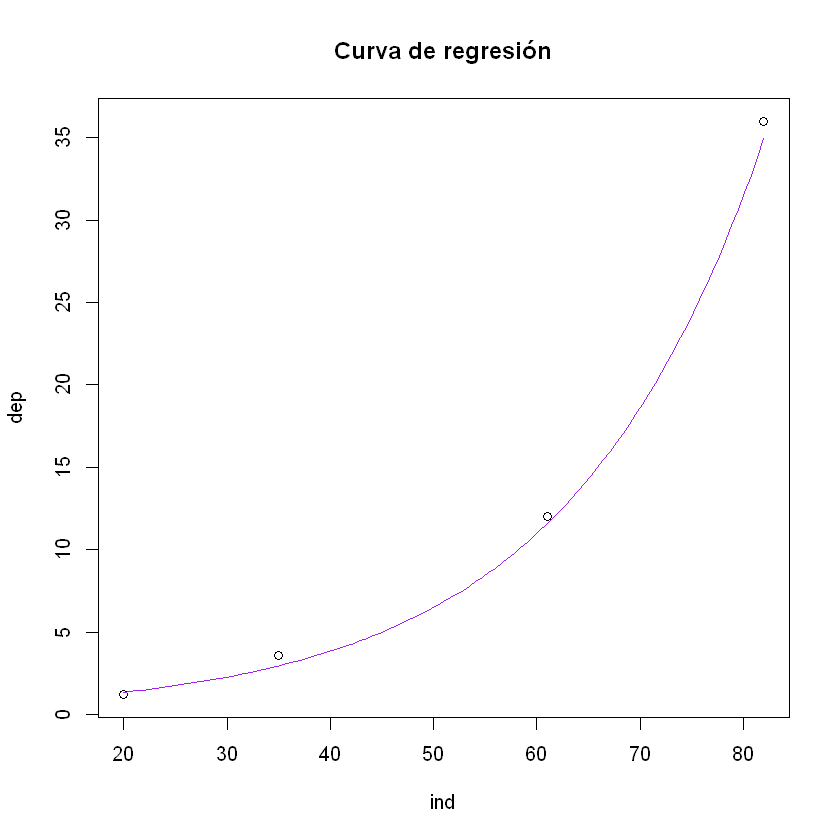

In [12]:
plot(ind,dep, main = "Curva de regresión")
curve(1.054^x*0.468, add = TRUE, col = "purple") 

## Ejemplo 3:

In [14]:
tiempo = 1:10
gramos = c(0.097,0.709,2.698,6.928,15.242,29.944,52.902,83.903,120.612,161.711)
d.f = data.frame(tiempo,gramos)
d.f

tiempo,gramos
<int>,<dbl>
1,0.097
2,0.709
3,2.698
4,6.928
5,15.242
6,29.944
7,52.902
8,83.903
9,120.612


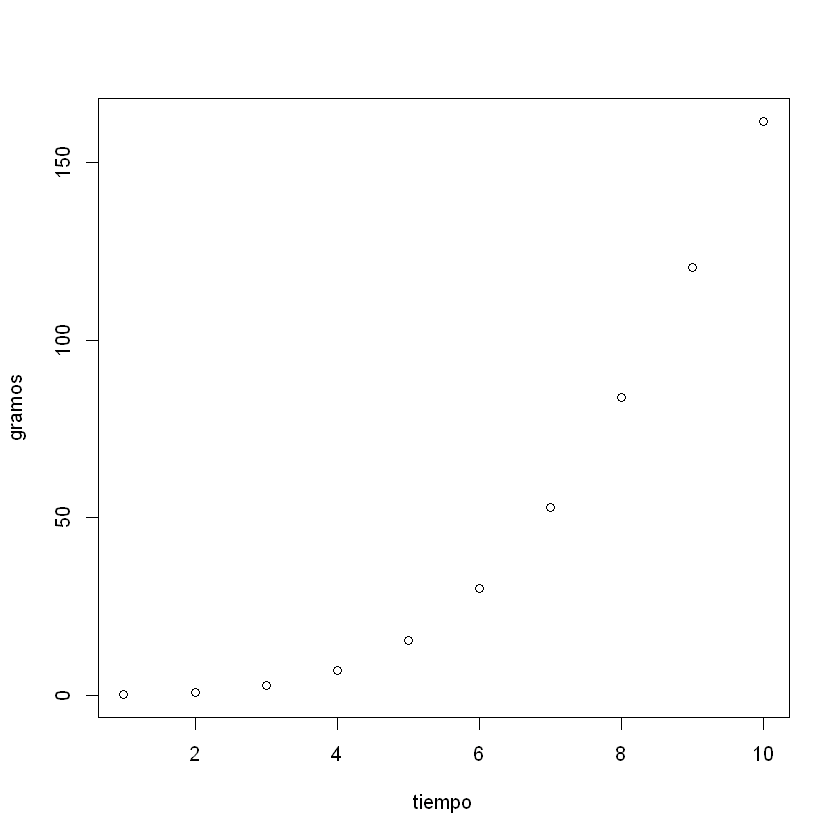

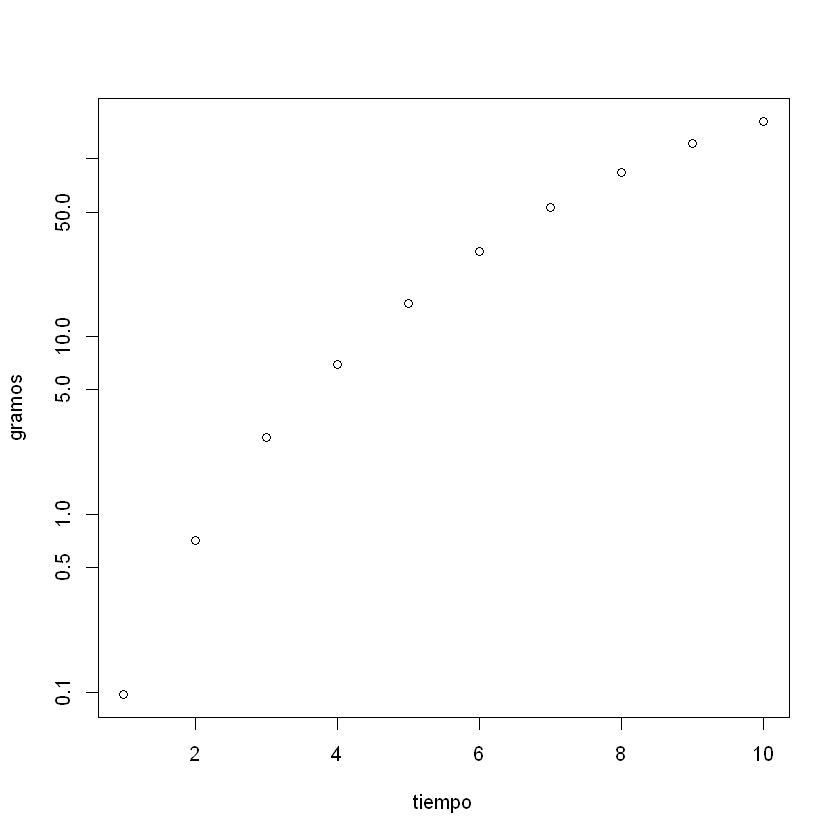

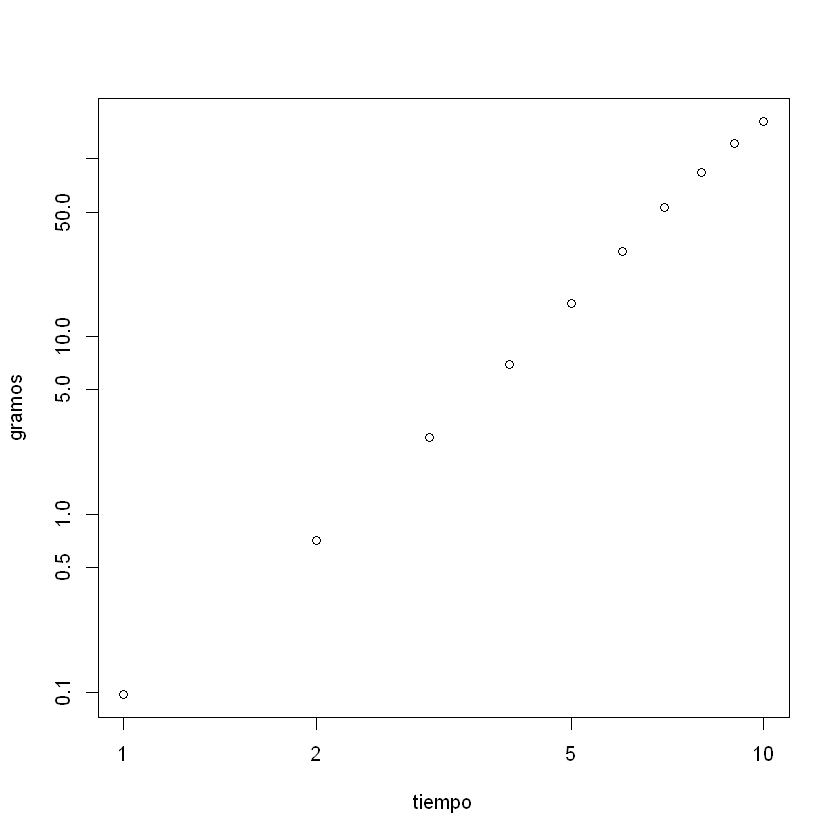

In [17]:
plot(d.f)
plot(d.f, log = "y") # transformaciones logaritmicas en variable dependitente
plot(d.f, log = "xy")# transformaciones logaritmicas en variable dependitente y independiente

In [16]:
lm(log10(gramos)~log10(tiempo), data = d.f)


Call:
lm(formula = log10(gramos) ~ log10(tiempo), data = d.f)

Coefficients:
  (Intercept)  log10(tiempo)  
       -1.093          3.298  


In [18]:
summary(lm(log10(gramos)~log10(tiempo), data = d.f))$r.squared

[1] 0.9982009

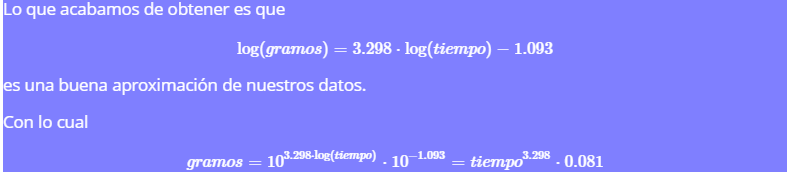

Observamos que existe una relacion potencial

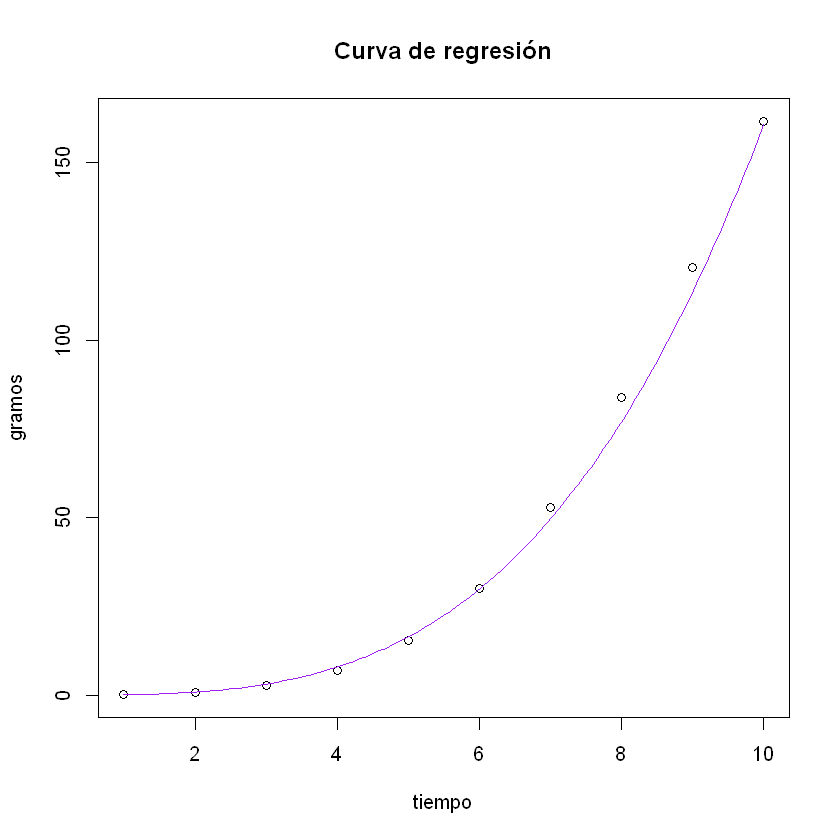

In [19]:
plot(d.f, main = "Curva de regresión")
curve(x^(3.298)*0.081, add=TRUE, col = "purple")